تحميل المكتبات وقراءة البيانات

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة البيانات من الملف
file_path = 'car_price.csv'
data = pd.read_csv(file_path)

# عرض بعض الصفوف للتأكد من صحة البيانات
print(data.head())

# عرض ملخص البيانات
print(data.info())


   index                                car_name car_prices_in_rupee  \
0      0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh   
1      1            Renault Duster RXZ Turbo CVT          12.83 Lakh   
2      2                      Toyota Camry 2.5 G          16.40 Lakh   
3      3                       Honda Jazz VX CVT           7.77 Lakh   
4      4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh   

   kms_driven fuel_type transmission  ownership  manufacture   engine    Seats  
0  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data co

التحقق من القيم المفقودة

In [569]:
# التحقق من وجود قيم مفقودة في البيانات
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# عرض الإحصائيات الوصفية
print(data.describe())


Missing values in each column:
 index                  0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64
             index  manufacture
count  5512.000000  5512.000000
mean   2755.500000  2015.455552
std    1591.321673     3.927974
min       0.000000  1995.000000
25%    1377.750000  2013.000000
50%    2755.500000  2016.000000
75%    4133.250000  2018.000000
max    5511.000000  2022.000000


### تنظيف وتحويل البيانات
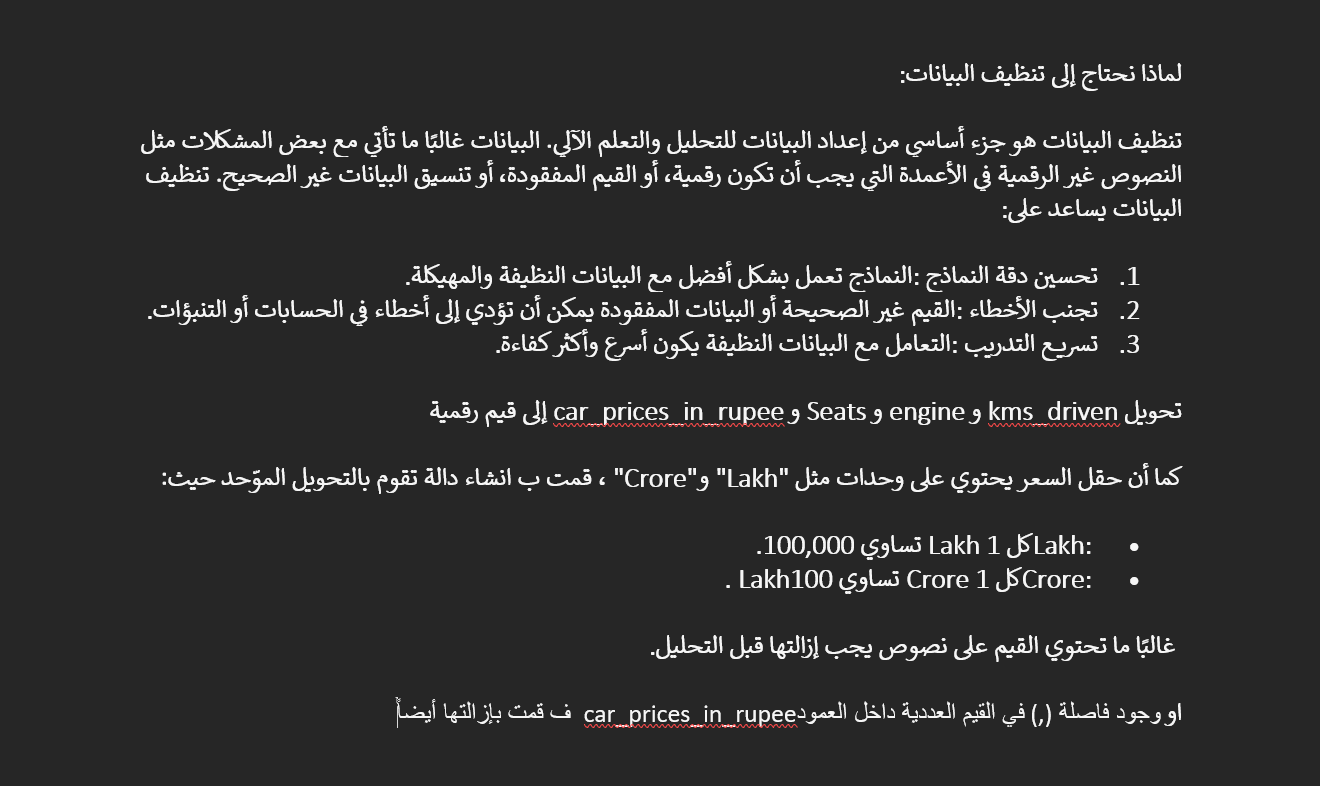

In [570]:
# إزالة النصوص وتحويل القيم إلى أرقام في عمود kms_driven
data['kms_driven'] = data['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود engine
data['engine'] = data['engine'].str.replace(' cc', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود Seats
data['Seats'] = data['Seats'].str.replace(' Seats', '').astype(float)

# التحقق من النتائج بعد التنظيف
print(data[['kms_driven', 'engine', 'Seats']].head())

print('\nThe Price:\n ')
# وظيفة لتحويل القيم
def convert_price(price):
       # إزالة الفواصل
    price = price.replace(',', '')
    if 'Lakh' in price:
        return float(price.replace(' Lakh', ''))
    elif 'Crore' in price:
        return float(price.replace(' Crore', '')) * 100  # لتحويل Crore إلى Lakh
    return price
    

# تطبيق التحويل على العمود
data['car_prices_in_rupee'] = data['car_prices_in_rupee'].apply(convert_price)

# التحقق من النتائج بعد التنظيف
print(data['car_prices_in_rupee'].head())



   kms_driven  engine  Seats
0     86226.0  1956.0    5.0
1     13248.0  1330.0    5.0
2     60343.0  2494.0    5.0
3     26696.0  1199.0    5.0
4     69414.0  1199.0    5.0

The Price:
 
0    10.03
1    12.83
2     16.4
3     7.77
4     5.15
Name: car_prices_in_rupee, dtype: object


تحليل البيانات الأولي
توزيع البيانات (Histogram)


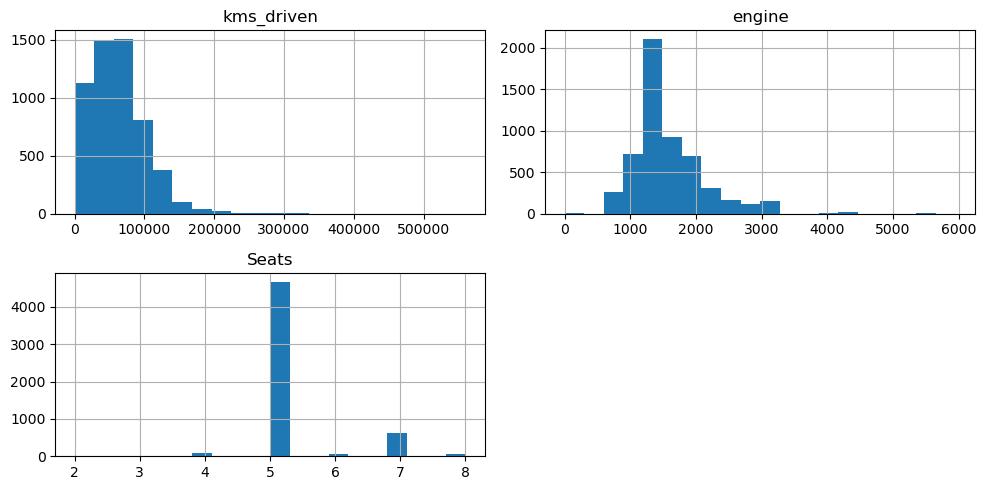

In [571]:
# رسم Histogram للأعمدة الرقمية
data[['kms_driven', 'engine', 'Seats']].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


رسم Boxplot


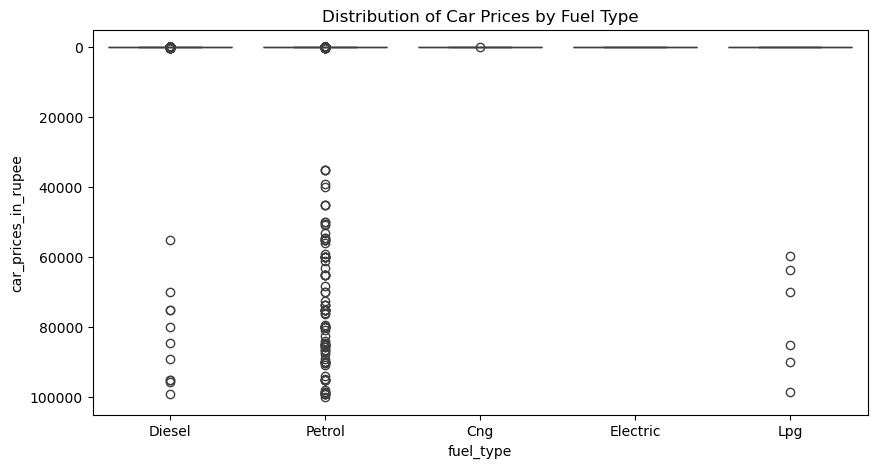

In [572]:
# رسم Boxplot بعد تحويل car_prices_in_rupee إلى أرقام
plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel_type', y='car_prices_in_rupee', data=data)
plt.title('Distribution of Car Prices by Fuel Type')
plt.show()


تحليل العلاقات باستخدام Pairplot

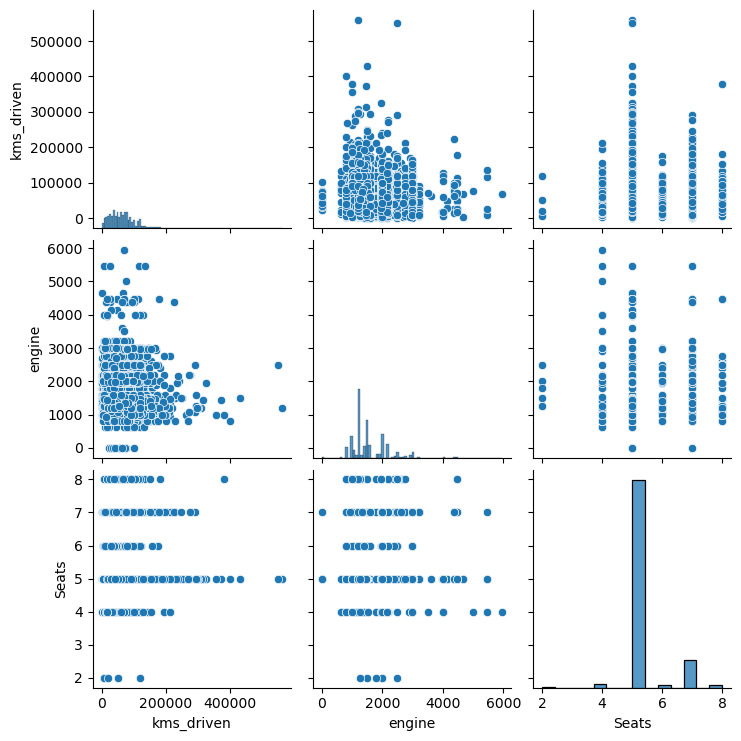

In [573]:
# رسم Pairplot لفهم العلاقات بين الأعمدة المهمة
sns.pairplot(data[['kms_driven', 'engine', 'Seats', 'car_prices_in_rupee']])
plt.show()

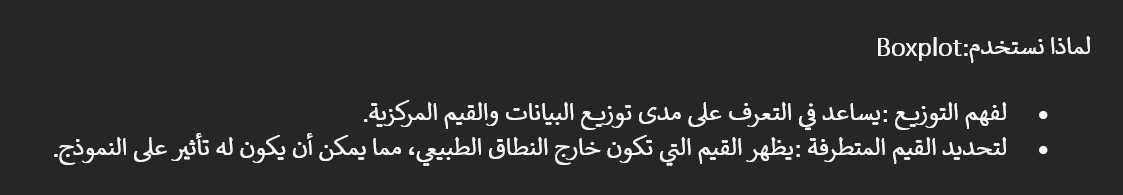
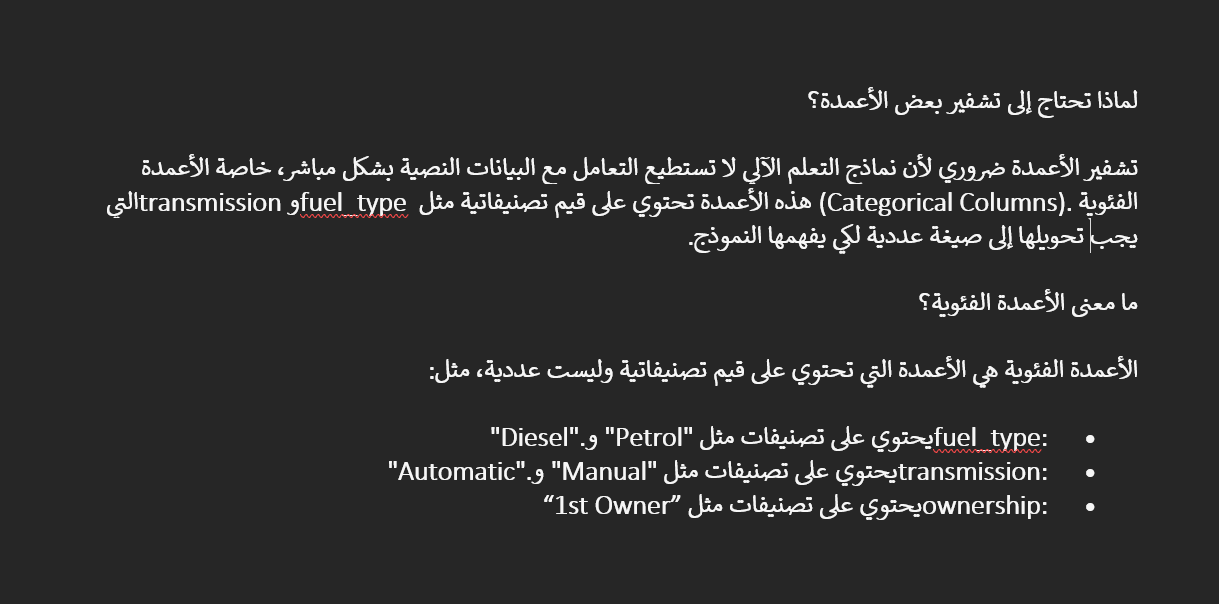

لقد وجدت طريقتين ل تشفير البيانات النصية وتحويلها الى رقم وأوجدت الفرق بينهما
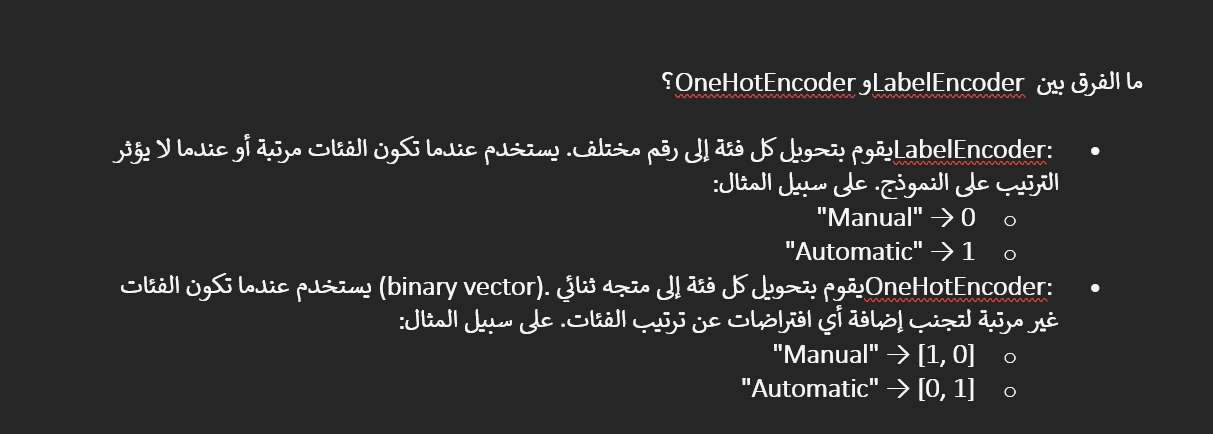

اهم خطوة في تنظيف البيانات هي تحديد الfeatures المهمة للتدريب
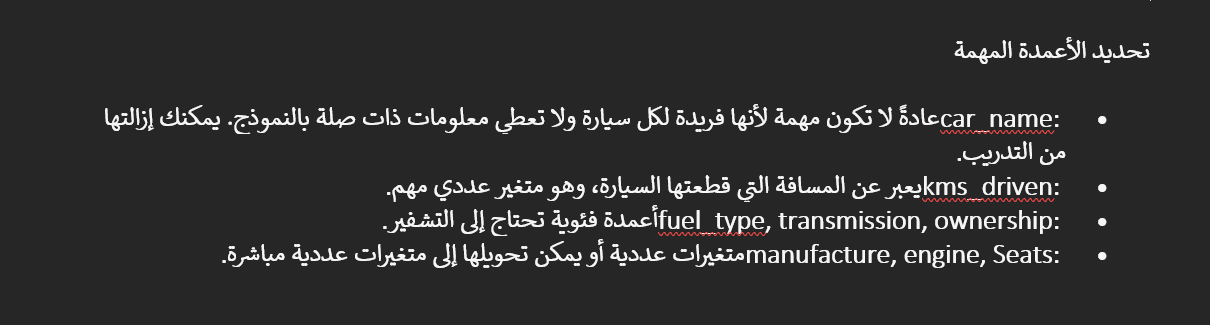

تقسيم البيانات إلى Features و Target
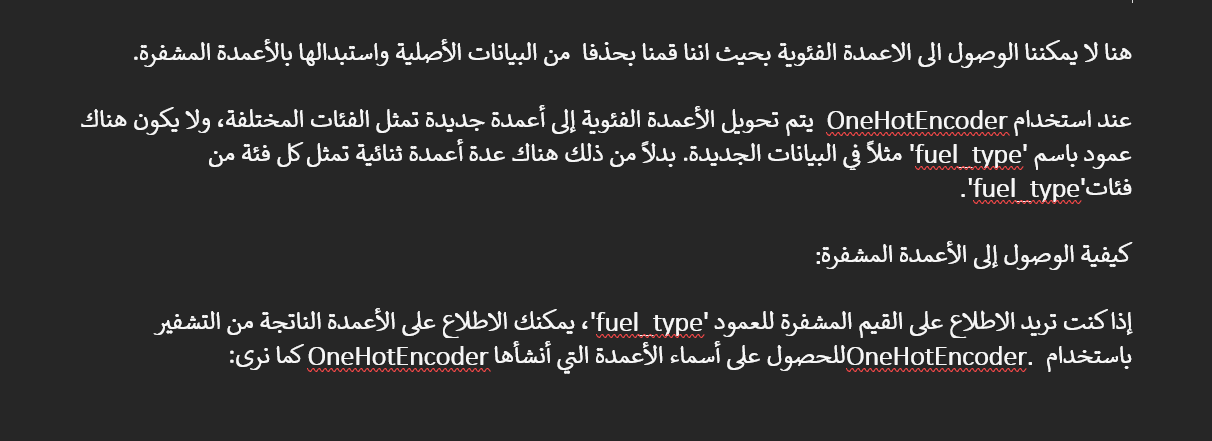


In [574]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# إعداد العرض الكامل للبيانات
pd.set_option('display.max_columns', None)  # عرض جميع الأعمدة
pd.set_option('display.max_rows', None)     # عرض جميع الصفوف
pd.set_option('display.max_colwidth', None) # عرض كامل للعرض النصي في الخلايا
pd.set_option('display.width', 1000)        # عرض البيانات في سطر واحد بشكل أوسع


# إزالة الأعمدة غير المهمة
data = data.drop(['car_name'], axis=1)
data = data.drop(['index'], axis=1)

# تحديد الأعمدة الفئوية لتشفيرها
categorical_cols = ['fuel_type', 'transmission', 'ownership']

# استخدام OneHotEncoder لتشفير الأعمدة الفئوية
#  حيث ان OneHotEncoder
# قام بفصل كل عمود واعاد تسميته الى اعمجة منفصلة ب اسماء مختلفة تعبر عن القيم الموجودة داخله
# بعد التشفير، ستكون هناك أعمدة مثل:
# fuel_type_Diesel
# fuel_type_Petrol

encoder = OneHotEncoder()
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())

# الحصول على أسماء الأعمدة التي تم إنشاؤها بواسطة OneHotEncoder
encoded_categorical_cols.columns = encoder.get_feature_names_out(categorical_cols)

# دمج الأعمدة المشفرة مع البيانات الأصلية
data = data.join(encoded_categorical_cols)

# إزالة الأعمدة الأصلية الفئوية
data = data.drop(categorical_cols, axis=1)

# تقسيم البيانات إلى Features و Target
X = data.drop('car_prices_in_rupee', axis=1)  # Features
y = data['car_prices_in_rupee']               # Target

print('\nThe Input X is:\n',X.head())

print('\nThe Output Y is:\n',y.head())



The Input X is:
    kms_driven  manufacture  engine  Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0     86226.0         2017  1956.0    5.0            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1     13248.0         2021  1330.0    5.0            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2     60343.0         2016  2494.0    5.0            0.0               0.0           

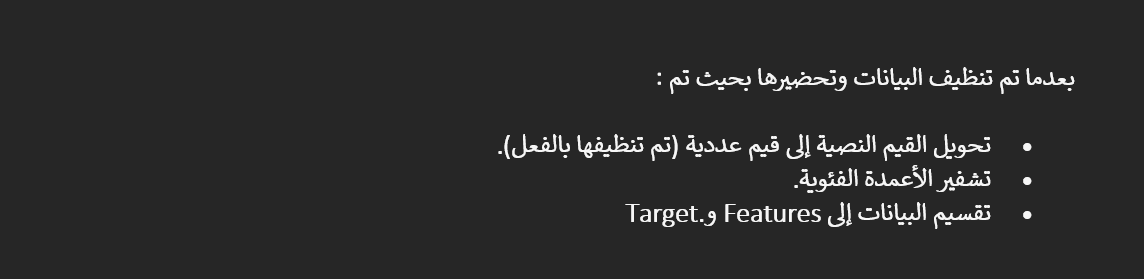
الآن سوف ننتقل الى الخطوة التالية والتي هي تجهيز البيانات ل تدريب الموديل وتقسيمها